<a href="https://colab.research.google.com/github/pra961/MAT421/blob/main/ModuleB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lagrange Polynomial Interpolation

Lagrange polynomial interpolation finds a single polynomial that goes through all the data points. This polynomial is referred to as a Lagrange
polynomial, L(x), and as an interpolation function, it should have the property L(x_i) = y_i for every point in the data set.

Given the dataset x=[0,1,2] and y=[1,3,2], P_1(x) = 1/2 * (x^2 - 3x + 2), P_2(x) = -x^2 + 2x, and P_3(x) = 1/2 * (x^2 - x).

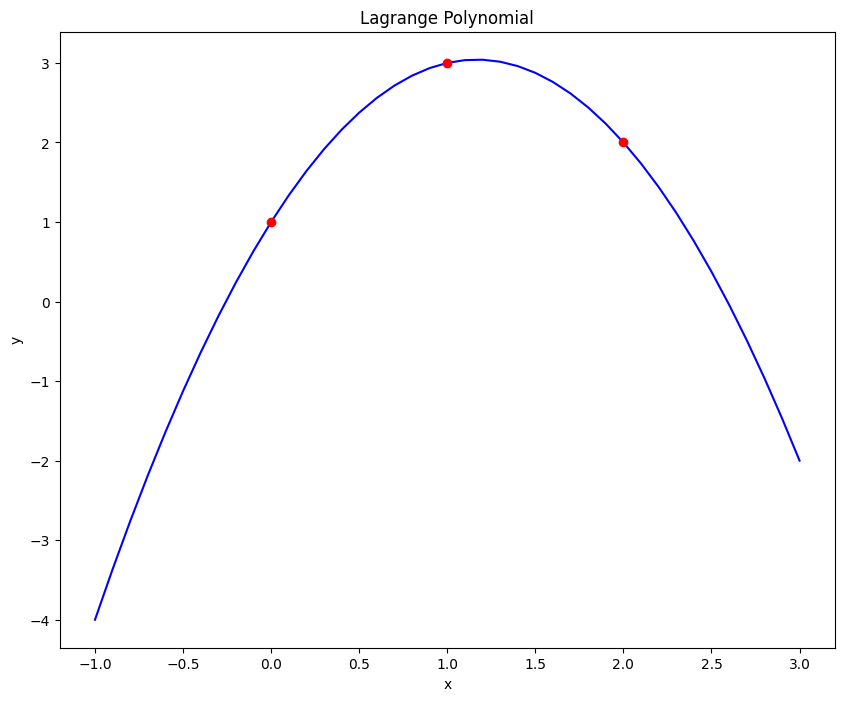

In [4]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

x = [0, 1, 2]
y = [1, 3, 2]
P1_coeff = [1,-1.5,.5]
P2_coeff = [0, 2,-1]
P3_coeff = [0,-.5,.5]

P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(-1.0, 3.1, 0.1)

L = P1 + 3*P2 + 2*P3
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We can see above that the Lagrange polynomial goes through all three points.

# Newton's Polynomial Interpolation

Newton’s polynomial interpolation is another way to t exactly for a set of data points.

The formula is f(x) = the sum from i=0 to i=n of a_i*n_i(x)

We can construct a divided differences table to determine the coefficients a_i.

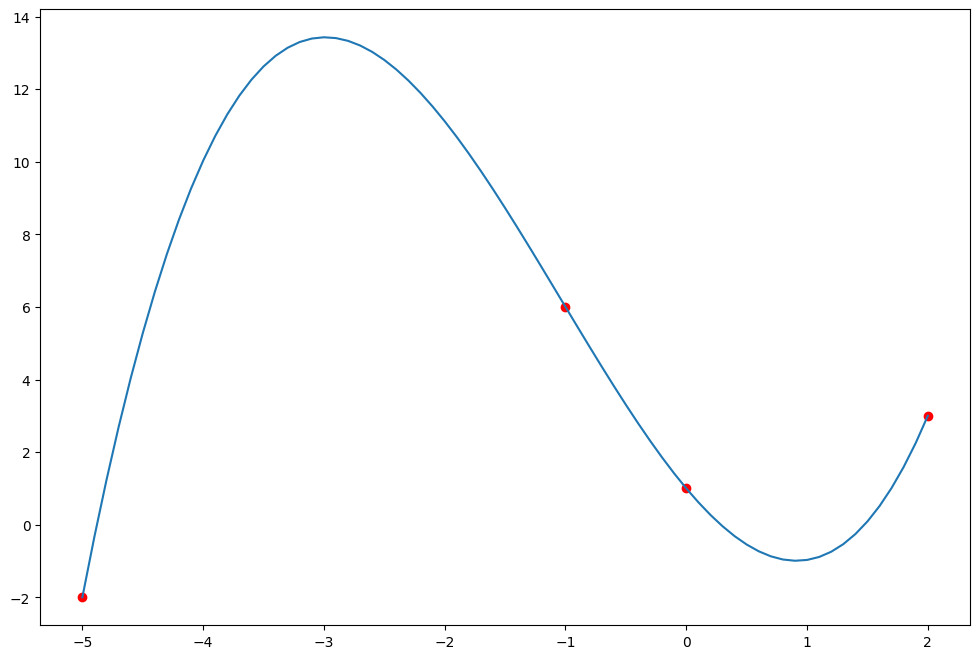

In [5]:
def divided_diff(x, y):
  n = len(y)
  coef = np.zeros([n, n])
  coef[:,0] = y
  for j in range(1,n):
    for i in range(n-j):
      coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
  return coef

def newton_poly(coef, x_data, x):
  n = len(x_data) - 1
  p = coef[n]
  for k in range(1,n+1):
    p = coef[n-k] + (x -x_data[n-k])*p
  return p

x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])

a_s = divided_diff(x, y)[0, :]

x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)
plt.figure(figsize = (12, 8))
plt.plot(x, y, 'ro')
plt.plot(x_new, y_new)

We can see that the function goes exactly through all the points.